In [79]:
using CalculusWithJulia
using Plots
using LaTeXStrings
using Symbolics

In [80]:
gr()

Plots.GRBackend()

In [81]:


h(x,y) = 200 - (x^2) - (2*(y^2))
h(v) = h(v...)

h (generic function with 2 methods)

In [82]:
x = -15:0.1:15
y = -15:0.1:15;

In [83]:
z = [h(xi, yi) for yi in y, xi in x];

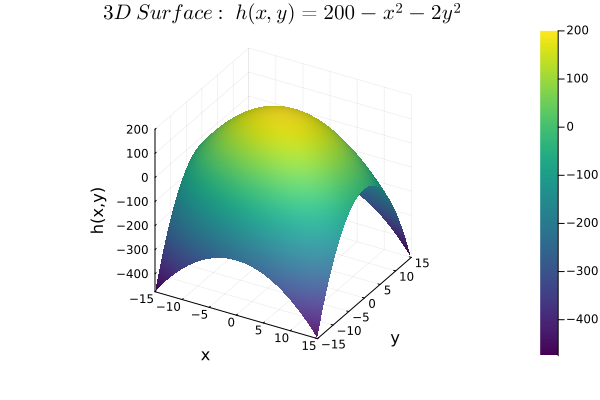

In [84]:
D = surface(x, y, z,
    xlabel="x", ylabel="y", zlabel="h(x,y)",
    title=L"3D\ Surface:\ h(x,y) = 200 - x^2 - 2y^2",
    color=:viridis)

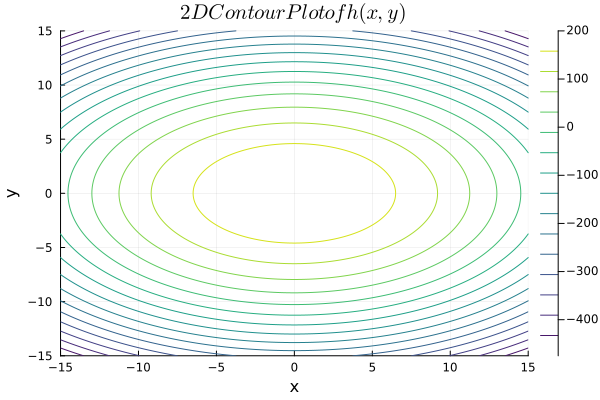

In [85]:
contour(x, y, z,
    xlabel="x", ylabel="y",
    title=L"2D Contour Plot of h(x,y)",
    color=:viridis)

In [86]:
xs = -10:2:10
ys = -10:2:10
ps = [[x,y] for x in xs for y in ys];  

In [87]:
# The dot . after gradient(h) applies this gradient function element-wise to each point in ps (this is Julia’s broadcasting syntax
vs = gradient(h).(ps)

121-element Vector{Vector{Int64}}:
 [20, 40]
 [20, 32]
 [20, 24]
 [20, 16]
 [20, 8]
 [20, 0]
 [20, -8]
 [20, -16]
 [20, -24]
 [20, -32]
 ⋮
 [-20, 24]
 [-20, 16]
 [-20, 8]
 [-20, 0]
 [-20, -8]
 [-20, -16]
 [-20, -24]
 [-20, -32]
 [-20, -40]

In [88]:
minimum([u/maximum(getindex.(vs,i)) for (i,u) in enumerate((2,2))])

0.05

In [89]:
λ = 0.9* minimum([u/maximum(getindex.(vs,i)) for (i,u) in enumerate((2,2))])

0.045000000000000005

In [90]:
λ * vs

121-element Vector{Vector{Float64}}:
 [0.9000000000000001, 1.8000000000000003]
 [0.9000000000000001, 1.4400000000000002]
 [0.9000000000000001, 1.08]
 [0.9000000000000001, 0.7200000000000001]
 [0.9000000000000001, 0.36000000000000004]
 [0.9000000000000001, 0.0]
 [0.9000000000000001, -0.36000000000000004]
 [0.9000000000000001, -0.7200000000000001]
 [0.9000000000000001, -1.08]
 [0.9000000000000001, -1.4400000000000002]
 ⋮
 [-0.9000000000000001, 1.08]
 [-0.9000000000000001, 0.7200000000000001]
 [-0.9000000000000001, 0.36000000000000004]
 [-0.9000000000000001, 0.0]
 [-0.9000000000000001, -0.36000000000000004]
 [-0.9000000000000001, -0.7200000000000001]
 [-0.9000000000000001, -1.08]
 [-0.9000000000000001, -1.4400000000000002]
 [-0.9000000000000001, -1.8000000000000003]

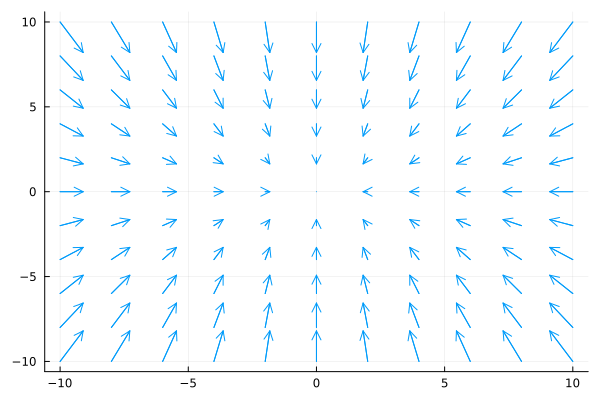

In [91]:
quiver(unzip(ps)..., quiver=unzip(λ * vs))

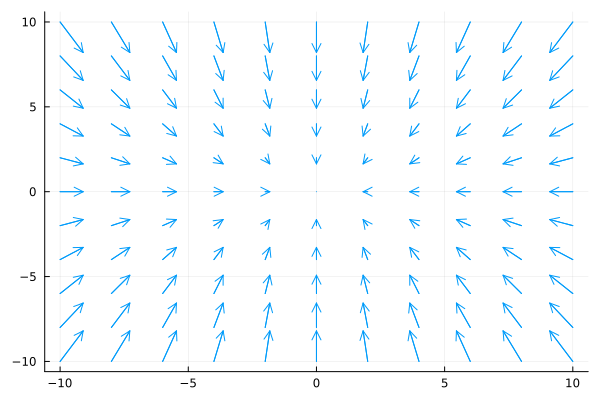

In [96]:
h(x,y) = 200 - (x^2) - (2*(y^2))
h(v) = h(v...)
gradient_h(x,y) = (-2x,-4y)
gradient_h(v) = gradient_h(v...)
vs = gradient_h.(ps)
λ =0.045
vx, vy = unzip(vs)
vx_scaled = λ .* vx
vy_scaled = λ .* vy
quiver(unzip(ps)..., quiver=(vx_scaled, vy_scaled))

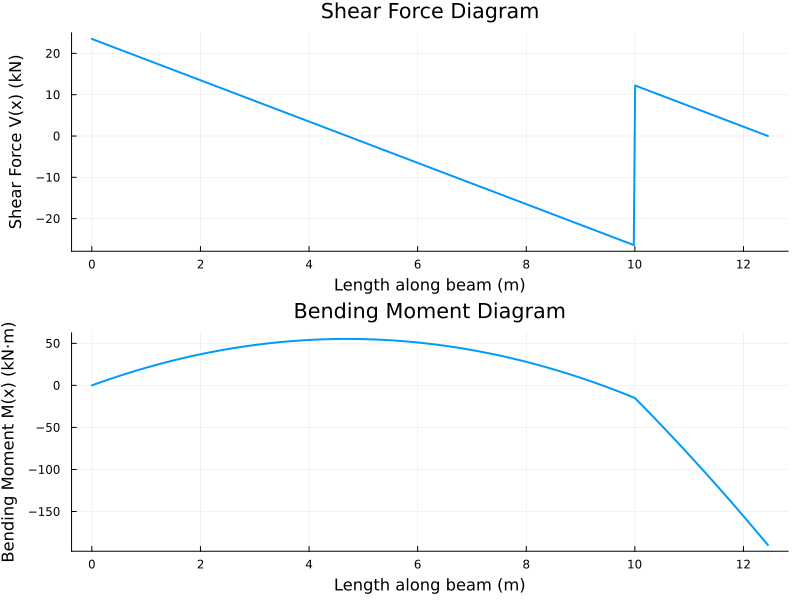

In [97]:
using Plots

# Function to compute reactions, shear and moment for given l and q
function beam_solution(l, q)
    # Total length
    L = 1.245 * l

    # Reactions (from static equilibrium)
    W = q * L
    R_B = q * 0.775 * l
    R_A = W - R_B

    # Shear force function V(x)
    function V(x)
        if 0 <= x <= l
            return R_A - q * x
        elseif l < x <= L
            return R_A - q * x + R_B
        else
            error("x out of beam range")
        end
    end

    # Bending moment function M(x)
    function M(x)
        if 0 <= x <= l
            return R_A * x - q * x^2 / 2
        elseif l < x <= L
            return R_A * x - q * x^2 / 2 - R_B * (x - l)
        else
            error("x out of beam range")
        end
    end

    return R_A, R_B, V, M, L
end

# Parameters (you can change these!)
l = 10.0   # length between supports in meters
q = 5.0    # UDL in kN/m

# Get beam results
R_A, R_B, V, M, L = beam_solution(l, q)

# Prepare points along the beam for plotting
xs = range(0, stop=L, length=500)
Vs = [V(x) for x in xs]
Ms = [M(x) for x in xs]

# Plot Shear Force Diagram (SFD)
p1 = plot(xs, Vs,
    xlabel="Length along beam (m)",
    ylabel="Shear Force V(x) (kN)",
    title="Shear Force Diagram",
    legend=false,
    lw=2,
    grid=true)

# Plot Bending Moment Diagram (BMD)
p2 = plot(xs, Ms,
    xlabel="Length along beam (m)",
    ylabel="Bending Moment M(x) (kN·m)",
    title="Bending Moment Diagram",
    legend=false,
    lw=2,
    grid=true)

# Show both plots vertically stacked
plot(p1, p2, layout=(2,1), size=(800,600))
